In [1]:
import pandas as pd
import numpy as np

### Importação dos dados - Base de licitações gerada no arquivo anterior

In [2]:
lic = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Repositórios\residencia2\Analises\lic2.csv")

In [3]:
pd.options.display.max_colwidth = 30

In [4]:
pd.options.display.max_rows = 1000

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
lic.groupby(['Modalidade Compra']).agg({'total':['mean','min','max','std']})

total                          \
                                      mean     min             max   
Modalidade Compra                                                    
Dispensa de Licitação         259632.08005 0.00000  57226785.00000   
Inexigibilidade de Licitação 1364805.37022 0.01000 341871720.35000   
Pregão                       1556603.38102 0.00000 117008222.12000   
Pregão - Registro de Preço    436072.74549 0.00000 117538143.00000   

                                             
                                        std  
Modalidade Compra                            
Dispensa de Licitação         2419357.14685  
Inexigibilidade de Licitação 14203743.23438  
Pregão                        6379831.69188  
Pregão - Registro de Preço    3913877.77533

In [7]:
lic.iloc[:,5].value_counts()

Dispensa de Licitação           1372
Pregão - Registro de Preço      1115
Pregão                           892
Inexigibilidade de Licitação     635
Name: Modalidade Compra, dtype: int64

In [29]:
# framework baseado em regras (alterável)
# yml = json melhorado (pyyml)

# Produzir ao fim uma TAG de suspeitos de desvio em licitações
# detecção de anomalias ao longo do tempo

# Modificar essa regra, para que seja baseada em algo já citado na literatura

def categorizeDispensa(x):
    #Inicialização das variáveis ------------------------------------
    classif=[] #Variável que salva a classificação da divisão
    div=[] #variável que salva o valor bruto da divisão pelos limites
    #
    teto_disp_o = 33000
    teto_RP_o = 3300000
    teto_Preg_o = 1
    teto_INEX_o = 1
    #
    teto_disp_c = 17600
    teto_RP_c = 1
    teto_Preg_c = 1
    teto_INEX_c = 1
    #----------------------------------------------------------------
    #Regras para licitações de obras
    if x.iloc[0,-2]=='OBRAS':

        '''if x.iloc[0,5]=='Dispensa de Licitação':
            div = teto_disp_o/x.iloc[0,-3]
            classif = ('O valor é {}% do teto'.format(div))'''
            
        if x.iloc[0,5]=='Pregão - Registro de Preço':
            div = x.iloc[0,-3]/teto_RP_o
            classif = ('O valor é {}% do teto ENTROU AQUI'.format(div))
            
        if x.iloc[0,5]=='Pregão':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Inexigibilidade de Licitação':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
    #Regras para licitações de compras e serviços
    else:

        if x.iloc[0,5]=='Dispensa de Licitação':
            div = x.iloc[0,-3]/teto_disp_c
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Pregão - Registro de Preço':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Pregão':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Inexigibilidade de Licitação':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
    return([div,classif])

# Teste de Modelos

- Categorização por diferença percentual do teto da classe

In [8]:
lic['div_piso'] = 0

In [9]:
#criar função disso, para jogar num framework só
for linha in range(len(lic['Modalidade Compra'])):
    if lic['TAG'][linha]==1:
        if (lic['Modalidade Compra'][linha] == 'Pregão - Registro de Preço'):
            lic['div_piso'][linha]=lic['total'][linha]/3300000
    else:
        lic['div_piso'][linha]='n_se_aplica'

C:\Users\efvs\AppData\Local\Temp/ipykernel_15164/2704201114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lic['div_piso'][linha]='n_se_aplica'
C:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
lic.head()

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,Data Resultado Compra,Data Abertura,total,tipo,TAG,div_piso
0,1,12020,154699,INST. FED. DO PARANA/CAMPU...,-99,Pregão - Registro de Preço,23411011872202019,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,26000,Ministério da Educação,26432,Instituto Federal do Paraná,LONDRINA,22/01/2021,14/12/2020,41998.08000,OBRAS,0,n_se_aplica
1,103,52020,155821,INST.FED.BAIANO / CAMPUS S...,-99,Pregão - Registro de Preço,23790251015202032,Objeto: Pregão Eletrônico ...,Evento de Suspensão Publicado,26000,Ministério da Educação,26404,Instituto Federal Baiano,SERRINHA,15/01/2021,05/01/2021,7969.80000,OBRAS,0,n_se_aplica
2,108,52020,160148,BASE DE ADMINISTRACAO E AP...,-99,Pregão - Registro de Preço,65263005692202099,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,52000,Ministério da Defesa,52121,Comando do Exército,BRASILIA,15/01/2021,11/01/2021,53640.96000,OBRAS,0,n_se_aplica
3,109,52020,160199,HOSPITAL MILITAR DE AREA D...,-99,Pregão - Registro de Preço,64583000150202016,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,52000,Ministério da Defesa,52121,Comando do Exército,RECIFE,25/01/2021,13/10/2020,13490.00000,OBRAS,0,n_se_aplica
4,128,62020,160082,PREFEITURA MILITAR DE BRAS...,-99,Pregão - Registro de Preço,64482011291202021,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,52000,Ministério da Defesa,52121,Comando do Exército,BRASILIA,13/01/2021,05/01/2021,803000.00000,OBRAS,0,n_se_aplica


### Testes com clusterização
- Divisão dos dados

In [11]:
#Ajuste da das datas pro formato correto
lic['Data Resultado Compra']=pd.to_datetime(lic['Data Resultado Compra'],format='%d/%m/%Y')

In [12]:
#Extração das datas
data=lic[lic['Modalidade Compra']!='Pregão - Registro de Preço']['Data Resultado Compra']

In [13]:
#Extração dos valores
X=lic[lic['Modalidade Compra']!='Pregão - Registro de Preço']['total']

In [29]:
#Normalização pelo valor máximo
X=X/max(X)
X=X.round(4)

In [30]:
X.reset_index(drop=True,inplace=True)

In [31]:
data.reset_index(drop=True,inplace=True)

In [20]:
data=np.array(data)
data=data.reshape(-1,1)

In [32]:
serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)
serie_totais.set_index('Data Resultado Compra',inplace=True)
del(serie_totais['index'])

## KMEANS PARA TIMESERIES

<AxesSubplot:xlabel='Data Resultado Compra'>

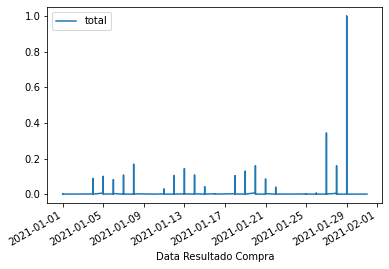

In [27]:
serie_totais.plot()

In [18]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)

In [19]:
model.fit(serie_totais)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4)

In [20]:
model.cluster_centers_

array([[[0.00126906]],

       [[1.        ]],

       [[0.10994167]],

       [[0.3423    ]]])

In [21]:
predictions = model.predict(serie_totais)
centers=model.cluster_centers_

C:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2899 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [24]:
model.

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
lic.head()

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,Data Resultado Compra,Data Abertura,total,tipo,TAG
0,1,12020,154699,INST. FED. DO PARANA/CAMPU...,-99,Pregão - Registro de Preço,23411011872202019,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,26000,Ministério da Educação,26432,Instituto Federal do Paraná,LONDRINA,22/01/2021,14/12/2020,41998.08000,OBRAS,0
1,103,52020,155821,INST.FED.BAIANO / CAMPUS S...,-99,Pregão - Registro de Preço,23790251015202032,Objeto: Pregão Eletrônico ...,Evento de Suspensão Publicado,26000,Ministério da Educação,26404,Instituto Federal Baiano,SERRINHA,15/01/2021,05/01/2021,7969.80000,OBRAS,0
2,108,52020,160148,BASE DE ADMINISTRACAO E AP...,-99,Pregão - Registro de Preço,65263005692202099,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,52000,Ministério da Defesa,52121,Comando do Exército,BRASILIA,15/01/2021,11/01/2021,53640.96000,OBRAS,0
3,109,52020,160199,HOSPITAL MILITAR DE AREA D...,-99,Pregão - Registro de Preço,64583000150202016,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,52000,Ministério da Defesa,52121,Comando do Exército,RECIFE,25/01/2021,13/10/2020,13490.00000,OBRAS,0
4,128,62020,160082,PREFEITURA MILITAR DE BRAS...,-99,Pregão - Registro de Preço,64482011291202021,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,52000,Ministério da Defesa,52121,Comando do Exército,BRASILIA,13/01/2021,05/01/2021,803000.00000,OBRAS,0


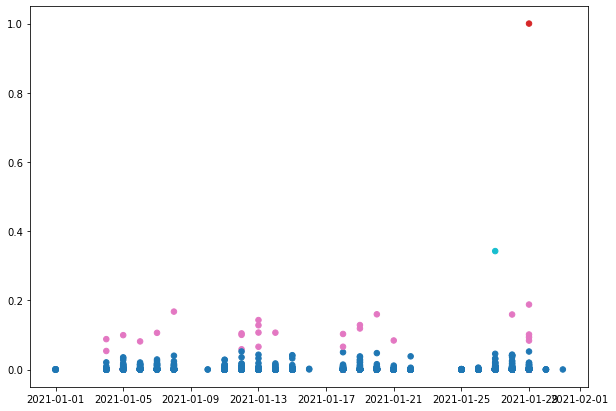

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais.index,serie_totais.iloc[:,0],c=predictions, s=30, cmap='tab10')
#plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

## KMEANS NORMAL

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)
kmeans.labels_
kmeans.fit(serie_totais)

KMeans(n_clusters=4, random_state=0)

In [20]:
predictions = kmeans.predict(serie_totais)
centers=kmeans.cluster_centers_

In [21]:
kmeans.cluster_centers_

array([[7.94599365e-04],
       [1.00000000e+00],
       [1.33800000e-01],
       [3.98608696e-02]])

In [26]:
pd.DataFrame(kmeans.labels_).value_counts()

0    2833
3      46
2      19
1       1
dtype: int64

In [27]:
lic['tags_02']=pd.DataFrame(kmeans.labels_)

In [33]:
serie_totais['tags_02']=pd.DataFrame(kmeans.labels_)

In [34]:
serie_totais.groupby(['tags_02']).agg({'total':['mean','std','max','min']})

Empty DataFrame
Columns: [(total, mean), (total, std), (total, max), (total, min)]
Index: []

(array([18628., 18632., 18636., 18640., 18644., 18648., 18652., 18656.,
        18659.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

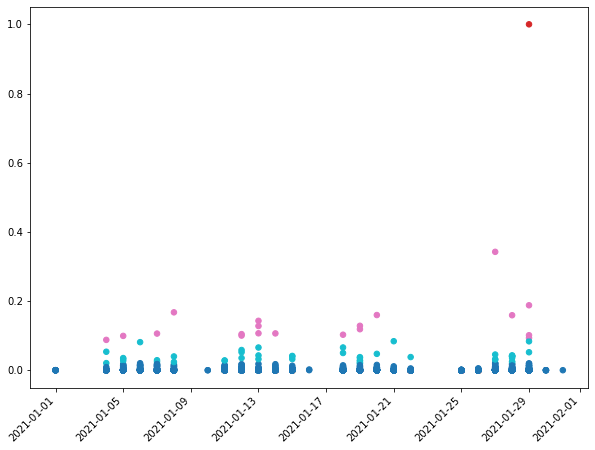

In [22]:
# avaliar a variação do cluster mes a mes
# Extrair as bordas de decisão
#como interpretar o Kmeans

from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais.index,serie_totais.iloc[:,0],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')
#plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [41]:
serie_totais.columns

Index(['total'], dtype='object')

In [42]:
labels=serie_totais.columns

In [43]:
import numpy as np
from sklearn.datasets import load_digits

serie_totais, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from functions import bench_k_means

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

bench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)
################
kmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)

kmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)
################
bench_k_means(kmeans=kmeans, name="k-means", data=serie_totais, labels=labels)

pca = PCA(n_components=n_digits).fit(serie_totais)
kmeanspca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeanspca, name="PCA-based", data=serie_totais, labels=labels)


print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	50.652s	20	0.123	0.265	0.168	0.077	0.164	0.030
k-means++	0.076s	69662	0.680	0.719	0.699	0.570	0.695	0.172
random   	0.139s	89120	0.364	0.609	0.456	0.286	0.454	0.127
k-means  	0.141s	89120	0.364	0.609	0.456	0.286	0.454	0.125
PCA-based	0.018s	74152	0.653	0.683	0.668	0.539	0.664	0.125
__________________________________________________________________________________


In [50]:
lic['Modalidade Compra'].value_counts()

Dispensa de Licitação           1372
Pregão - Registro de Preço      1115
Pregão                           892
Inexigibilidade de Licitação     635
Name: Modalidade Compra, dtype: int64

<AxesSubplot:>

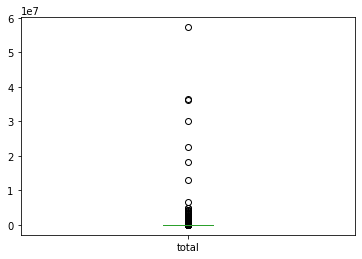

In [57]:
lic[lic['Modalidade Compra']=='Dispensa de Licitação']['total'].plot.box()

<AxesSubplot:>

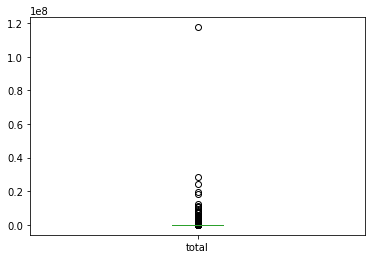

In [58]:
lic[lic['Modalidade Compra']=='Pregão - Registro de Preço']['total'].plot.box()

<AxesSubplot:>

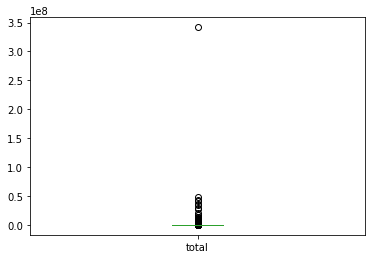

In [61]:
lic[lic['Modalidade Compra']=='Inexigibilidade de Licitação']['total'].plot.box()

<AxesSubplot:>

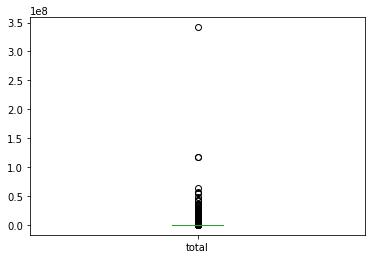

In [60]:
lic['total'].plot.box()

### Testando para mais meses

# FEV

In [66]:
lic_fev = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Dados licitações\Licitação\202102_Licitaç¦o.csv", encoding='latin-1',sep=';',decimal=',')
lic_fev.rename(columns={"Valor Licitação": "total"},inplace=True)

In [69]:
lic_fev['Data Resultado Compra']=pd.to_datetime(lic_fev['Data Resultado Compra'],format='%d/%m/%Y')
data=lic_fev[lic_fev['Modalidade Compra']!='Pregão - Registro de Preço']['Data Resultado Compra']
X=lic_fev[lic_fev['Modalidade Compra']!='Pregão - Registro de Preço']['Valor Licitação']
X=X/max(X)
X=X.round(4)
X.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)

serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)
serie_totais.set_index('Data Resultado Compra',inplace=True)
del(serie_totais['index'])

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)
kmeans.labels_
kmeans.fit(serie_totais)

KMeans(n_clusters=4, random_state=0)

In [71]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)
model.fit(serie_totais)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4)

In [74]:
serie_totais, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

bench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)
################
kmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)

kmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)
################
bench_k_means(kmeans=kmeans, name="k-means", data=serie_totais, labels=labels)

pca = PCA(n_components=n_digits).fit(serie_totais)
kmeanspca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeanspca, name="PCA-based", data=serie_totais, labels=labels)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	56.258s	19	0.096	0.263	0.141	0.064	0.136	0.030
k-means++	0.073s	69662	0.680	0.719	0.699	0.570	0.695	0.172
random   	0.137s	89120	0.364	0.609	0.456	0.286	0.454	0.128
k-means  	0.142s	89120	0.364	0.609	0.456	0.286	0.454	0.131
PCA-based	0.018s	74152	0.653	0.683	0.668	0.539	0.664	0.135


# MAR

In [67]:
lic_mar = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Dados licitações\Licitação\202103_Licitaç¦o.csv", encoding='latin-1',sep=';',decimal=',')
lic_mar.rename(columns={"Valor Licitação": "total"},inplace=True)

In [79]:
lic_mar['Data Resultado Compra']=pd.to_datetime(lic_mar['Data Resultado Compra'],format='%d/%m/%Y')
data=lic_mar[lic_mar['Modalidade Compra']!='Pregão - Registro de Preço']['Data Resultado Compra']
X=lic_mar[lic_mar['Modalidade Compra']!='Pregão - Registro de Preço']['Valor Licitação']
X=X/max(X)
X=X.round(4)
X.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)

serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)
serie_totais.set_index('Data Resultado Compra',inplace=True)
del(serie_totais['index'])

In [80]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)
kmeans.labels_
kmeans.fit(serie_totais)

KMeans(n_clusters=4, random_state=0)

In [81]:
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)
model.fit(serie_totais)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4)

In [82]:
serie_totais, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [83]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

bench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)
################
kmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)

kmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)
################
bench_k_means(kmeans=kmeans, name="k-means", data=serie_totais, labels=labels)

pca = PCA(n_components=n_digits).fit(serie_totais)
kmeanspca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeanspca, name="PCA-based", data=serie_totais, labels=labels)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	51.495s	19	0.093	0.263	0.138	0.039	0.133	0.003
k-means++	0.079s	69662	0.680	0.719	0.699	0.570	0.695	0.176
random   	0.165s	89120	0.364	0.609	0.456	0.286	0.454	0.117
k-means  	0.169s	89120	0.364	0.609	0.456	0.286	0.454	0.132
PCA-based	0.023s	72686	0.636	0.658	0.647	0.521	0.643	0.129


## ABR

In [68]:
lic_abr = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Dados licitações\Licitação\202104_Licitaç¦o.csv", encoding='latin-1',sep=';',decimal=',')
lic_abr.rename(columns={"Valor Licitação": "total"},inplace=True)

In [85]:
lic_abr = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Dados licitações\Licitação\202104_Licitaç¦o.csv", encoding='latin-1',sep=';',decimal=',')
data=lic_abr[lic_abr['Modalidade Compra']!='Pregão - Registro de Preço']['Data Resultado Compra']
X=lic_abr[lic_abr['Modalidade Compra']!='Pregão - Registro de Preço']['Valor Licitação']
X=X/max(X)
X=X.round(4)
X.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)

serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)
serie_totais.set_index('Data Resultado Compra',inplace=True)
del(serie_totais['index'])

kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)
kmeans.labels_
kmeans.fit(serie_totais)

model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)
model.fit(serie_totais)

serie_totais, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

bench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)
################
kmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)

kmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)
################
bench_k_means(kmeans=kmeans, name="k-means", data=serie_totais, labels=labels)

pca = PCA(n_components=n_digits).fit(serie_totais)
kmeanspca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeanspca, name="PCA-based", data=serie_totais, labels=labels)

# digits: 10; # samples: 1797; # features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	69.972s	19	0.144	0.414	0.214	0.103	0.210	0.035
k-means++	0.072s	69662	0.680	0.719	0.699	0.570	0.695	0.181
random   	0.137s	89120	0.364	0.609	0.456	0.286	0.454	0.129
k-means  	0.140s	89120	0.364	0.609	0.456	0.286	0.454	0.133
PCA-based	0.022s	72686	0.636	0.658	0.647	0.521	0.643	0.142


## Analise conjunta

In [69]:
lic_all=pd.concat([lic,lic_fev,lic_mar,lic_abr])

In [70]:
lic_all.columns

Index(['Unnamed: 0', 'Número Licitação', 'Código UG', 'Nome UG',
       'Código Modalidade Compra', 'Modalidade Compra', 'Número Processo',
       'Objeto', 'Situação Licitação', 'Código Órgão Superior',
       'Nome Órgão Superior', 'Código Órgão', 'Nome Órgão', 'Município',
       'Data Resultado Compra', 'Data Abertura', 'total', 'tipo', 'TAG'],
      dtype='object')

In [71]:
data=lic_all[lic_all['Modalidade Compra']!='Pregão - Registro de Preço']['Data Resultado Compra']
X=lic_all[lic_all['Modalidade Compra']!='Pregão - Registro de Preço']['total']
X=X/max(X)
X=X.round(4)
X.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)

serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)
serie_totais.set_index('Data Resultado Compra',inplace=True)
del(serie_totais['index'])

'''kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)
kmeans.labels_
kmeans.fit(serie_totais)

model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)
model.fit(serie_totais)

serie_totais, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

bench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)
################
kmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)

kmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)
################
bench_k_means(kmeans=kmeans, name="k-means", data=serie_totais, labels=labels)

pca = PCA(n_components=n_digits).fit(serie_totais)
kmeanspca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeanspca, name="PCA-based", data=serie_totais, labels=labels)'''

'kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)\nkmeans.labels_\nkmeans.fit(serie_totais)\n\nmodel = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)\nmodel.fit(serie_totais)\n\nserie_totais, labels = load_digits(return_X_y=True)\n(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size\n\nprint(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")\n\nprint(82 * "_")\nprint("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")\n\nbench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)\n################\nkmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)\nbench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)\n\nkmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)\nbench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)\n################\nbench_k_means(kmeans=kmeans, name

In [72]:
serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)

In [73]:
serie_totais.dtypes

index                      int64
total                    float64
Data Resultado Compra     object
dtype: object

In [74]:
serie_totais['Data Resultado Compra'] = pd.to_datetime(serie_totais['Data Resultado Compra'],format='%d/%m/%Y')

In [75]:
serie_totais.dtypes

index                             int64
total                           float64
Data Resultado Compra    datetime64[ns]
dtype: object

In [76]:
del(serie_totais['index'])

In [77]:
serie_totais2 = serie_totais

In [78]:
serie_totais2.set_index('Data Resultado Compra', inplace = True)

<AxesSubplot:xlabel='Data Resultado Compra'>

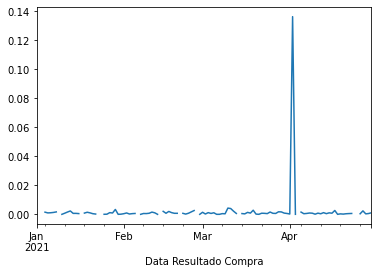

In [79]:
serie_totais2['total'].resample('D').mean().plot()

In [80]:
serie_totais2.to_csv("../data/serie_test.csv")

In [81]:
serie_totais2['total'].resample('D').mean().to_csv("../data/serie_test_agrupada.csv")

<AxesSubplot:xlabel='Data Resultado Compra'>

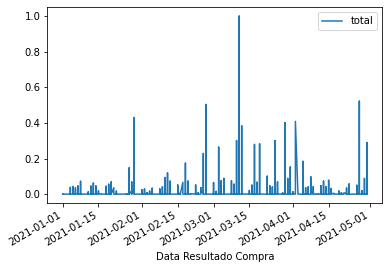

In [82]:
serie_totais.plot()

FEVEREIRO
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	56.258s	19	0.096	0.263	0.141	0.064	0.136	0.030
k-means++	0.073s	69662	0.680	0.719	0.699	0.570	0.695	0.172
random   	0.137s	89120	0.364	0.609	0.456	0.286	0.454	0.128
k-means  	0.142s	89120	0.364	0.609	0.456	0.286	0.454	0.131
PCA-based	0.018s	74152	0.653	0.683	0.668	0.539	0.664	0.135

In [119]:
lic_fev[lic_fev['total']==1162150270000]

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,Data Resultado Compra,Data Abertura,total
4062,222020,200331,FUNDO NACIONAL DE SEGURANC...,-99,Pregão - Registro de Preço,08020.008738/2019,Objeto: Pregão Eletrônico ...,Evento de Resultado de Jul...,30000,Ministério da Justiça e Se...,30911,Fundo Nacional de Seguranç...,BRASILIA,22/02/2021,16/10/2020,1162150270000.00000


In [111]:
lic_fev['total'].describe()

count            5619.00000
mean        207464549.26781
std       15503600847.26283
min                 0.00000
25%              1128.50000
50%              5837.50000
75%             41850.00000
max     1162150270000.00000
Name: total, dtype: float64

<AxesSubplot:>

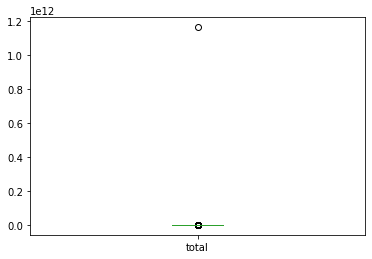

In [107]:
lic_fev[lic_fev['total']!=0]['total'].plot.box()

MARÇO
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	51.495s	19	0.093	0.263	0.138	0.039	0.133	0.003
k-means++	0.079s	69662	0.680	0.719	0.699	0.570	0.695	0.176
random   	0.165s	89120	0.364	0.609	0.456	0.286	0.454	0.117
k-means  	0.169s	89120	0.364	0.609	0.456	0.286	0.454	0.132
PCA-based	0.023s	72686	0.636	0.658	0.647	0.521	0.643	0.129

<AxesSubplot:>

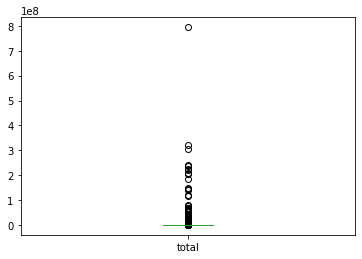

In [99]:
lic_mar['total'].plot.box()

ABRIL
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	49.521s	19	0.140	0.323	0.196	0.095	0.192	-0.008
k-means++	0.073s	69662	0.680	0.719	0.699	0.570	0.695	0.183
random   	0.137s	89120	0.364	0.609	0.456	0.286	0.454	0.132
k-means  	0.141s	89120	0.364	0.609	0.456	0.286	0.454	0.126
PCA-based	0.021s	72686	0.636	0.658	0.647	0.521	0.643	0.162

<AxesSubplot:>

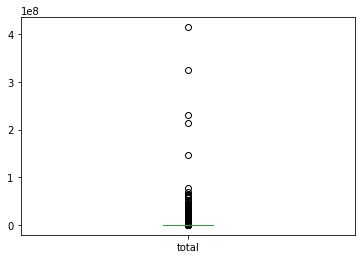

In [100]:
lic_abr['total'].plot.box()

## APLICANDO PARA INEXIBILIDADE - LEGAIS

In [ ]:
inex_datas=lic[(lic['Modalidade Compra']=='Inexigibilidade de Licitação') & (lic['TAG']==1)]['Data Resultado Compra']
inex_totais=lic[(lic['Modalidade Compra']=='Inexigibilidade de Licitação') & (lic['TAG']==1)]['total']

In [ ]:
inex_totais=inex_totais/max(inex_totais)

In [ ]:
serie_totais_inex=pd.concat([inex_datas,inex_totais],axis=1)

In [ ]:
serie_totais_inex.set_index('Data Resultado Compra',inplace=True)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais_inex)
kmeans.labels_
kmeans.fit(serie_totais_inex)

predictions = kmeans.predict(serie_totais_inex)
centers=kmeans.cluster_centers_

kmeans.cluster_centers_

from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais_inex.index,serie_totais_inex.iloc[:,0],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')

## APLICANDO PARA PREGÃO - LEGAIS

In [ ]:
preg_datas=lic[(lic['Modalidade Compra']=='Pregão') & (lic['TAG']==1)]['Data Resultado Compra']
preg_totais=lic[(lic['Modalidade Compra']=='Pregão') & (lic['TAG']==1)]['total']

In [ ]:
preg_totais=preg_totais/max(inex_totais)

In [ ]:
serie_totais_preg=pd.concat([preg_datas,preg_totais],axis=1)

In [ ]:
serie_totais_preg.set_index('Data Resultado Compra',inplace=True)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais_preg)
kmeans.labels_
kmeans.fit(serie_totais_preg)

predictions = kmeans.predict(serie_totais_preg)
centers=kmeans.cluster_centers_

kmeans.cluster_centers_

from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais_preg.index,serie_totais_preg.iloc[:,0],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')